# Zomato Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

In [3]:
zomato=pd.read_csv('zomato.csv')
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
zomato.shape

(9551, 21)

In [5]:
#checking for NULL values
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisines seem to contain some null values. Hence any further analysis involving Cuisines the NaN values have to be considered. 

In [6]:
country_wise=pd.read_excel('Country-Code.xlsx')
country_wise.head(2)

,Country Code,Country
0,1,India
1,14,Australia


Let's merge both datasets to understand the data better countrywise.

In [7]:
df=pd.merge(zomato,country_wise,on='Country Code',how='left')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# EDA and Visualisation

Before we ask question on the dataset, it would be helpful to understand the resturants geographical spread, understanding the rating, Currency, Online Delivery, City coverage..etc

List of Countries the survey is spread across

In [10]:
for country in pd.unique(country_wise.Country):
    print(country)
print()
print('Total number of Countries in survey ', len(pd.unique(country_wise.Country))) 

India
Australia
Brazil
Canada
Indonesia
New Zealand
Phillipines
Qatar
Singapore
South Africa
Sri Lanka
Turkey
UAE
United Kingdom
United States

Total number of Countries in survey  15


This survey seems to have spread accoss 15 counteries. This shows that Zomata is a multinational company having acitive business in all the counteries listed above.

In [20]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [35]:
labels=list(df.Country.value_counts().index)
values=list(df.Country.value_counts().values)

In [36]:
fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

As Zomato is a startup from India, it makes sense that it has maximum business spread across resturants in India.

In [43]:
df2=df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df2

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the realation between Aggregate rating, color and text. We conclude the following color assigned to the ratings:

Rating 0 - White - Not rated

Rating 1.8 to 2.4 - Red - Poor

Rating 2.5 to 3.4 - Orange - Average

Rating 3.5 to 3.9 - Yellow - Good

Rating 4.0 to 4.4 - Green - Very Good

Rating 4.5 to 4.9 - Dark Green - Excellent

Let us try to understand the spread of rating across resturants

<AxesSubplot:title={'center':'Spread of Rating'}, xlabel='Rating color', ylabel='Rating Count'>

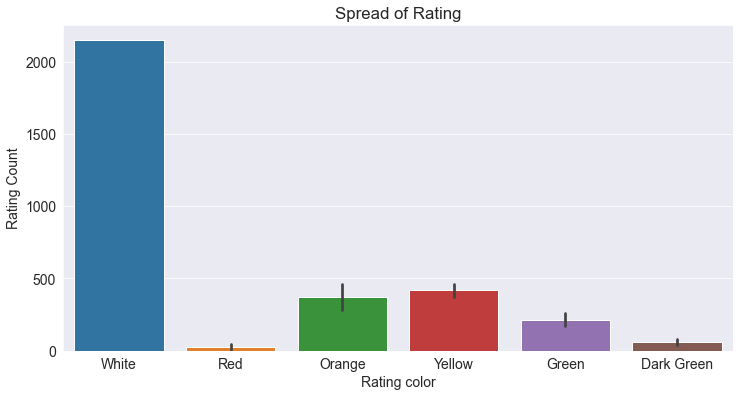

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.rcParams['font.size']=14
plt.title('Spread of Rating')
sns.barplot(x='Rating color',y='Rating Count',data=df2)

Interesting insight, Most of the resturants seem to have got No rating. Let us further check if these resturants belong to some specific country.

In [55]:
no_rating=df[df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating count'})
no_rating

,Country,Rating count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have maximum number of unrated resturants. This could be due the fact that in many parts of India the culture of odering food online is still gaining momentum hence most of the resturants are still unrated on Zomato as majority of the people might gravitate towards actually going to the resturant for their food.

# Country and Currency

In [78]:
country_currency=df[['Currency','Country']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count',axis=1,inplace=True)
country_currency.sort_values('Currency').reset_index(drop=True)

AttributeError: 'NoneType' object has no attribute 'sort_values'